# Text analysis of Google News about Israel and Hamas

# 1 Scraping Google News


In [5]:
pip install feedparser


In [8]:
pip install newspaper3k


In [9]:
# Import necessary libraries.
import feedparser
from bs4 import BeautifulSoup
import newspaper
from newspaper import Config
import csv
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [11]:
search_query = input("Enter search query\n>").replace(" ","+")
url = f"https://news.google.co.in/rss/search?q={search_query}&sort=date&num=1000"
header = ["Title", "Time", "Description", "Source"]
feed = feedparser.parse(url)
config = Config()
config.request_timeout = 100
with open("Hamas_data_df.csv", "w", newline="", encoding="utf-8") as file:
    writer = csv.writer(file)
    writer.writerow(header)

    for entry in feed.entries:
        article = newspaper.Article(entry.link,config=config)
        article.download()
        try:
            article.parse()
            article.nlp()
            title = article.title
            summary = article.summary
            description_html = entry.description
            soup = BeautifulSoup(description_html, "html.parser")
            description_text = soup.get_text(separator=" ")
            source = entry.link
            publish_time = entry.published
            data = [title, publish_time, summary, source]
            writer.writerow(data)

            print("<=" + "=" * 100 + "=>")
            print(f"URL: {url}")
            print(f"Title: {title}")
            print(f"Publish Time: {publish_time}")
            print(f"Summary: {summary}")
            print()
        except Exception as e:
            print("Error processing article: ", e)
            continue

print("Data saved to file")

Enter search query
>Hamas
<======================================================================================================>
URL: https://news.google.co.in/rss/search?q=Hamas&sort=date&num=1000
Title: Countries Halt Funding To UN Agency Amid Claim Staff Helped In Hamas Attack
Publish Time: Sat, 27 Jan 2024 22:16:26 GMT
Summary: Six European countries have paused funding for the UN refugee agency for PalestiniansSix European countries paused funding for the U.N. refugee agency for Palestinians (UNRWA) on Saturday, following allegations that some of its staff were involved in the October 7 Hamas attacks on Israel.
"Palestinians in Gaza did not need this additional collective punishment," Philippe Lazzarini, UNRWA commissioner-general, said on X.
The agency said on Friday it had opened an investigation into several employees and severed ties with those people.
Announcing the investigation, Lazzarini said on Friday that he had decided to terminate the contracts of some staff members 

In [20]:
search_query = input("Enter search query\n>").replace(" ","+")
url = f"https://news.google.co.in/rss/search?q={search_query}&sort=date&num=1000"
header = ["Title", "Time", "Description", "Source"]
feed = feedparser.parse(url)
config = Config()
config.request_timeout = 100
with open("Israel_data_df.csv", "w", newline="", encoding="utf-8") as file:
    writer = csv.writer(file)
    writer.writerow(header)

    for entry in feed.entries:
        article = newspaper.Article(entry.link,config=config)
        article.download()
        try:
            article.parse()
            article.nlp()
            title = article.title
            summary = article.summary
            description_html = entry.description
            soup = BeautifulSoup(description_html, "html.parser")
            description_text = soup.get_text(separator=" ")
            source = entry.link
            publish_time = entry.published
            data = [title, publish_time, summary, source]
            writer.writerow(data)

            print("<=" + "=" * 100 + "=>")
            print(f"URL: {url}")
            print(f"Title: {title}")
            print(f"Publish Time: {publish_time}")
            print(f"Summary: {summary}")
            print()
        except Exception as e:
            print("Error processing article: ", e)
            continue

print("Data saved to file")

Enter search query
>Israel
<======================================================================================================>
URL: https://news.google.co.in/rss/search?q=Israel&sort=date&num=1000
Title: Palestinians condemn suspension of UNRWA funding by Western nations
Publish Time: Sat, 27 Jan 2024 22:07:30 GMT
Summary: Australia, Germany, UK, US and others halt support after Israel accused UNRWA staff of involvement in Hamas’s October 7 attacks.
This has prompted at least 10 Western countries to withdraw or temporarily pause funding to the agency, a move the head of UNRWA called “shocking”.
Ireland and Norway, however, expressed continued support for UNRWA, saying the agency does crucial work to help Palestinians displaced and in desperate need of assistance in Gaza.
“The Israeli authorities have provided UNRWA with information about the alleged involvement of several UNRWA employees in the horrific attacks on Israel on October 7,” Lazzarini said.
Canada’s International Develo

##News about Hamas

In [142]:
import pandas as pd
Hamas_data_df = pd.read_csv('Hamas_data_df.csv')
Hamas_data_df['ID'] = range(1, len(Hamas_data_df) + 1)
Hamas_data_df.head()

,Title,Time,Description,Source,ID
0,Countries Halt Funding To UN Agency Amid Claim...,"Sat, 27 Jan 2024 22:16:26 GMT",Six European countries have paused funding for...,https://news.google.com/rss/articles/CBMinQFod...,1
1,"Netanyahu wields Hitler's 'Mein Kampf', pans W...","Sun, 28 Jan 2024 03:20:50 GMT",Israeli Prime Minister Benjamin Netanyahu call...,https://news.google.com/rss/articles/CBMiiQFod...,2
2,More Palestinians displaced as Israel battles ...,"Sun, 28 Jan 2024 11:18:00 GMT",It has released photos and videos supporting t...,https://news.google.com/rss/articles/CBMiiAFod...,3
3,Israel’s war on Gaza live: Meeting in Paris as...,"Sun, 28 Jan 2024 11:13:45 GMT","blinking-dot Live updates Live updates,Israel’...",https://news.google.com/rss/articles/CBMic2h0d...,4
4,Breaking! Hamas'shocking announcement on ICJ r...,"Fri, 26 Jan 2024 16:56:49 GMT","Jan 26, 2024, 10:26PM ISTSource: TOI.inThe Int...",https://news.google.com/rss/articles/CBMiswFod...,5


##News about Israel

In [24]:
Israel_data_df = pd.read_csv('Israel_data_df.csv')
Israel_data_df['ID'] = range(1, len(Israel_data_df) + 1)
Israel_data_df.head()

,Title,Time,Description,Source,ID
0,Palestinians condemn suspension of UNRWA fundi...,"Sat, 27 Jan 2024 22:07:30 GMT","Australia, Germany, UK, US and others halt sup...",https://news.google.com/rss/articles/CBMibmh0d...,1
1,Israel’s war on Gaza live: Meeting in Paris as...,"Sun, 28 Jan 2024 11:13:45 GMT","blinking-dot Live updates Live updates,Israel’...",https://news.google.com/rss/articles/CBMic2h0d...,2
2,Breaking! Hamas'shocking announcement on ICJ r...,"Fri, 26 Jan 2024 16:56:49 GMT","Jan 26, 2024, 10:26PM ISTSource: TOI.inThe Int...",https://news.google.com/rss/articles/CBMiswFod...,3
3,Who is Julia Sebutinde? The judge against all ...,"Fri, 26 Jan 2024 19:12:50 GMT",ICJ Judge Sebutinde voted against emergency me...,https://news.google.com/rss/articles/CBMicWh0d...,4
4,Israel reined in by ICJ rulings on Gaza - but ...,"Fri, 26 Jan 2024 19:09:00 GMT","It was clear, soon after the court's American ...",https://news.google.com/rss/articles/CBMiM2h0d...,5


# 2 Hamas Text Analysis

## 2.1 Sentiment Analysis

In [37]:
!pip install matplotlib

In [38]:
Hamas_df = Hamas_data_df['Description']

In [39]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [40]:
# Download the VADER lexicon for sentiment analysis
import nltk
nltk.download('vader_lexicon')
# Import the SentimentIntensityAnalyzer class from nltk.sentiment module
from nltk.sentiment import SentimentIntensityAnalyzer
# Import the tqdm library for creating progress bars
from tqdm.notebook import tqdm
# Create an instance of the SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [98]:
# Run the polarity score on the entire dataset
res = {}


for i, row in tqdm(Hamas_data_df.iterrows(), total=len(Hamas_data_df)):
    text = row['Description']
    if isinstance(text, float):
        text = str(text)
    res[row['ID']] = sia.polarity_scores(text)


  0%|          | 0/76 [00:00<?, ?it/s]

In [141]:
Sentiment_Hamas_df = pd.DataFrame(res).T
Sentiment_Hamas_df = Sentiment_Hamas_df.reset_index().rename(columns={'index': 'ID'})
Sentiment_Hamas_df = Sentiment_Hamas_df.merge(Hamas_data_df, how='left')

In [100]:
Sentiment_Hamas_df.head()

,ID,neg,neu,pos,compound,Title,Time,Description,Source
0,1,0.039,0.905,0.055,0.2960,Countries Halt Funding To UN Agency Amid Claim...,"Sat, 27 Jan 2024 22:16:26 GMT",Six European countries have paused funding for...,https://news.google.com/rss/articles/CBMinQFod...
1,2,0.042,0.919,0.039,-0.3182,"Netanyahu wields Hitler's 'Mein Kampf', pans W...","Sun, 28 Jan 2024 03:20:50 GMT",Israeli Prime Minister Benjamin Netanyahu call...,https://news.google.com/rss/articles/CBMiiQFod...
2,3,0.028,0.880,0.092,0.8268,More Palestinians displaced as Israel battles ...,"Sun, 28 Jan 2024 11:18:00 GMT",It has released photos and videos supporting t...,https://news.google.com/rss/articles/CBMiiAFod...
3,4,0.155,0.777,0.068,-0.5574,Israel’s war on Gaza live: Meeting in Paris as...,"Sun, 28 Jan 2024 11:13:45 GMT","blinking-dot Live updates Live updates,Israel’...",https://news.google.com/rss/articles/CBMic2h0d...
4,5,0.017,0.882,0.101,0.8807,Breaking! Hamas'shocking announcement on ICJ r...,"Fri, 26 Jan 2024 16:56:49 GMT","Jan 26, 2024, 10:26PM ISTSource: TOI.inThe Int...",https://news.google.com/rss/articles/CBMiswFod...


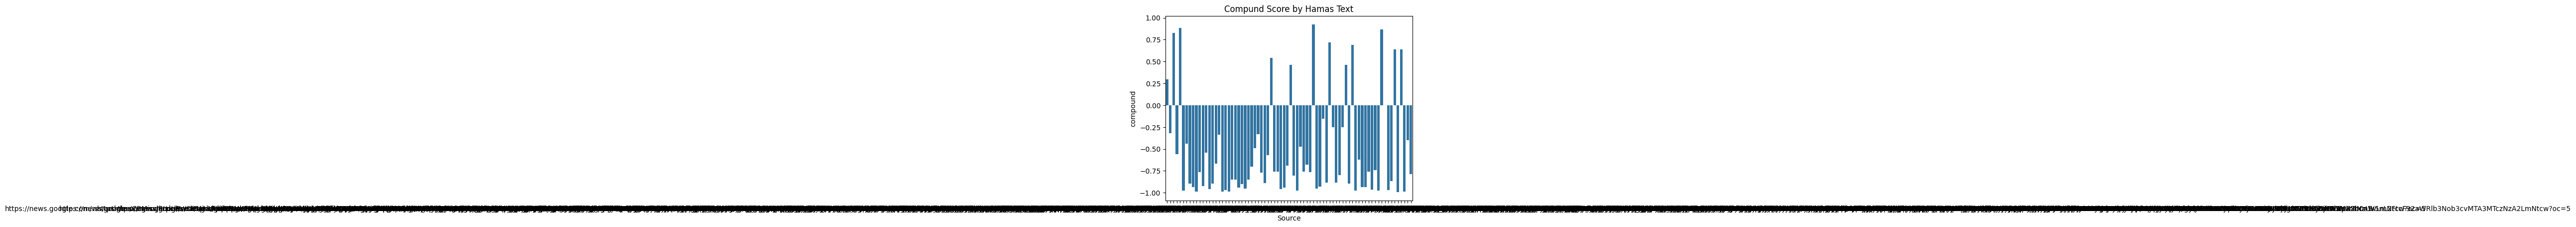

In [101]:
import seaborn as sns
import matplotlib.pyplot as plt
ax = sns.barplot(data=Sentiment_Hamas_df, x='Source', y='compound')
ax.set_title('Compund Score by Hamas Text')
plt.show()

In [120]:
import plotly.express as px

fig = px.scatter(Sentiment_Hamas_df, x='Time', y='compound', title='Hamas Scatter Plot',
                 labels={'x': 'X-axis', 'y': 'Y-axis'},
                 hover_name=None)

fig.update_layout(
    xaxis=dict(showgrid=True, title_font=dict(size=14)),
    yaxis=dict(showgrid=True, title_font=dict(size=14)),
    title=dict(x=0.5, xanchor='center', y=0.95, yanchor='top', font=dict(size=16))
)

fig.show()

## 2.2 Wordcloud

In [150]:
#Delete lines formatted as float
rows_with_floats = Hamas_data_df[Hamas_data_df.applymap(lambda x: isinstance(x, float)).any(axis=1)]
Hamas_data_df = Hamas_data_df.drop(rows_with_floats.index)
Hamas_df=Hamas_data_df ['Description']
Hamas_df.head()

0    Six European countries have paused funding for...
1    Israeli Prime Minister Benjamin Netanyahu call...
2    It has released photos and videos supporting t...
3    blinking-dot Live updates Live updates,Israel’...
4    Jan 26, 2024, 10:26PM ISTSource: TOI.inThe Int...
Name: Description, dtype: object

In [67]:
# install wordcloud module
!pip install wordcloud

In [57]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import string, os, random

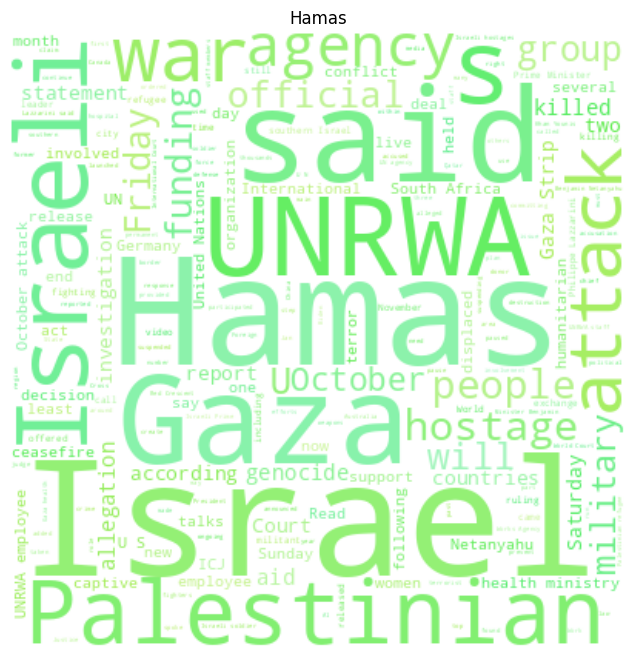

In [68]:
pos_text_cln = " ".join(Hamas_df)

def green_color(word, font_size, position, orientation, random_state=None, **kwargs):
    return 'hsl({:d}, 80%, {:d}%)'.format(random.randint(85, 140), random.randint(60, 80))

fig, ax1 = plt.subplots(1, 1, figsize=[15, 8])
wordcloud1 = WordCloud(background_color='white', height=400).generate(pos_text_cln)

ax1.imshow(wordcloud1.recolor(color_func=green_color, random_state=3), interpolation="bilinear")
ax1.axis('off')
ax1.set_title('Hamas')

plt.show()

## 2.3  Topic Modelling

In [71]:
pip install gensim

In [74]:
import re
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from pprint import pprint
import matplotlib.pyplot as plt
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [75]:
#preprocess the text
#step1:find the nouns in the text
def filter_nouns(tokens):
    #Use nltk to tag each token with its part-of-speech tag.
    tagged_tokens = nltk.pos_tag(tokens)
    # Filter the tagged tokens to include only the nouns.
    return [token for token, tag in tagged_tokens if tag.startswith('N')]
#step2:tokenize the text and make the letters lower
def tokenize(text):
    return word_tokenize(text.lower())
#step3:remove the english stopwords
def clean_tokenized_text(tokens):
    cleaned_tokens = [re.sub(r'[^a-zA-Z]', '', token) for token in tokens]
    cleaned_tokens = [token for token in cleaned_tokens if token]
    return cleaned_tokens
def remove_stopwords(tokens):
    # Get the stop words for the English language.
    stop_words = set(stopwords.words('english'))
    return [token for token in tokens if not token in stop_words]
#step4:lemmatize the text words
def lemmatize(tokens):
    # Create a WordNetLemmatizer object.
    lemmatizer = WordNetLemmatizer()
     # Lemmatize the token in the list.
    return [lemmatizer.lemmatize(token) for token in tokens]

In [128]:
Hamas_preprocessed_corpus = []

for document in Hamas_df:
    tokens = tokenize(document)
    tokens = remove_stopwords(tokens)
    tokens = lemmatize(tokens)
    tokens = filter_nouns(tokens)
    tokens = clean_tokenized_text(tokens)
    Hamas_preprocessed_corpus.append(tokens)

print(Hamas_preprocessed_corpus)

[['country', 'refugee', 'agency', 'country', 'refugee', 'agency', 'saturday', 'allegation', 'staff', 'hamas', 'attack', 'israel', 'gaza', 'punishment', 'philippe', 'lazzarini', 'agency', 'friday', 'investigation', 'employee', 'people', 'investigation', 'lazzarini', 'friday', 'terminate', 'contract', 'staff', 'member', 'protect', 'agency', 'ability', 'deliver', 'assistance', 'country', 'cessation', 'support', 'decision', 'x'], ['minister', 'benjamin', 'netanyahu', 'nazi', 'court', 'justice', 'decision', 'south', 'genocide', 'claim', 'israel', 'remembrance', 'day', 'liberation', 'auschwitz', 'arabiclanguage', 'copy', 'adolf', 'hitler', 'mein', 'kampf', 'get', 'help', 'south', 'africa', 'netanyahu', 'fact', 'world', 'nothing', 'holocaust', 'minister', 'friday', 'world', 'court', 'action', 'prevent', 'act', 'genocide', 'ceasefire'], ['photo', 'video', 'allegation', 'islamist', 'group', 'crescent', 'society', 'statement', 'team', 'hospital', 'khan', 'younis', 'surgery', 'oxygen', 'supply', 

In [77]:
#create a mapping between each word in the positive_preprocessed_corpus and a ID
id2word = corpora.Dictionary(Hamas_preprocessed_corpus)
texts = Hamas_preprocessed_corpus
#Creates a bag-of-words representation corpus for each document in the text with dictionary id2word.
corpus = [id2word.doc2bow(text) for text in texts]

In [78]:
#creat the Gensim LDA model and train it with corpus and id2word
lda_model = gensim.models.ldamodel.LdaModel(
    #num_topics sets the number of topics
    #random_state sets the random seed for topic modeling to keep a consistent results.
   corpus=corpus, id2word=id2word, num_topics=3, random_state=6,
    #update_every sets the frequency at which the model parameters are updated
    #chunksize sets the number of documents to be used in each training chunk
    #passes sets the number of times the model should pass over the corpus during training.
   update_every=3, chunksize=100, passes=200, alpha='auto', per_word_topics=True
)


In [79]:
#prints the topics learned by the trained LDA model
pprint(lda_model.print_topics())


[(0,
  '0.045*"israel" + 0.041*"hamas" + 0.032*"gaza" + 0.028*"hostage" + '
  '0.013*"attack" + 0.013*"war" + 0.012*"group" + 0.009*"ceasefire" + '
  '0.009*"court" + 0.009*"woman"'),
 (1,
  '0.029*"gaza" + 0.020*"court" + 0.017*"health" + 0.016*"ministry" + '
  '0.010*"israel" + 0.010*"hamas" + 0.009*"khan" + 0.009*"younis" + '
  '0.009*"genocide" + 0.009*"palestinian"'),
 (2,
  '0.031*"agency" + 0.023*"attack" + 0.018*"employee" + 0.018*"israel" + '
  '0.017*"funding" + 0.016*"hamas" + 0.015*"staff" + 0.013*"refugee" + '
  '0.013*"investigation" + 0.013*"allegation"')]


The first topic focus on the conflict between Israel and Hamas in Gaza, including terms related to warfare, violence, and legal aspects such as court and ceasefire.

The second one appears to cover issues related to health and legal matters in Gaza, including the role of courts, health ministry, and references to specific locations and terms like genocide and Palestinian.

The third one revolves around agencies, attacks, and investigations related to the conflict, mentioning terms like employee, funding, refugee, and allegation, indicating a broader view of the conflict's impact and investigation processes.

## 2.4 Network Analysis


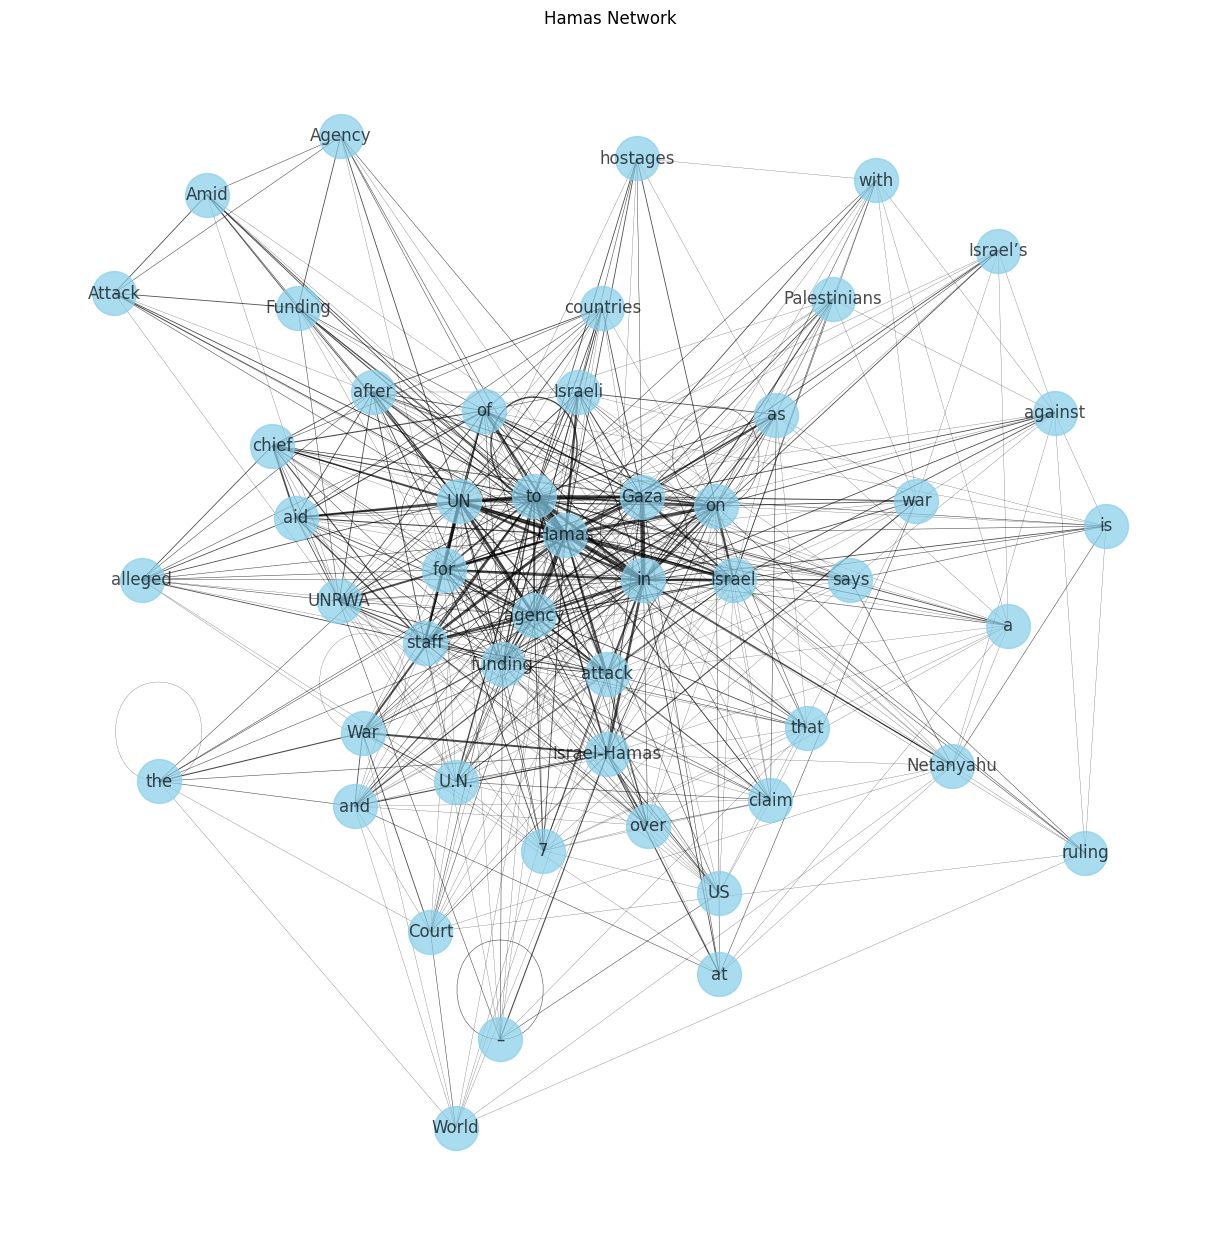

In [159]:
import networkx as nx
from itertools import combinations
from collections import defaultdict, Counter

def extract_keywords(text):
    return text.split()

all_keywords = [extract_keywords(text) for text in Hamas_data_df['Title']]
word_counts = Counter([word for keywords in all_keywords for word in keywords])
top_words = [word for word, count in word_counts.most_common(50)]

G = nx.Graph()

for keywords in all_keywords:
    for word1, word2 in combinations(keywords, 2):
        if word1 in top_words and word2 in top_words:
            if G.has_edge(word1, word2):
                G[word1][word2]['weight'] += 1
            else:
                G.add_edge(word1, word2, weight=1)


plt.figure(figsize=(12, 12))
pos = nx.spring_layout(G, k=0.5)
nx.draw(G, pos, node_size=1000, node_color='skyblue', with_labels=True, font_size=12,
        width=[d['weight']*0.2 for (u, v, d) in G.edges(data=True)], alpha=0.7)
plt.title('Hamas Network')
plt.show()



#2.4 Time Series Analysis


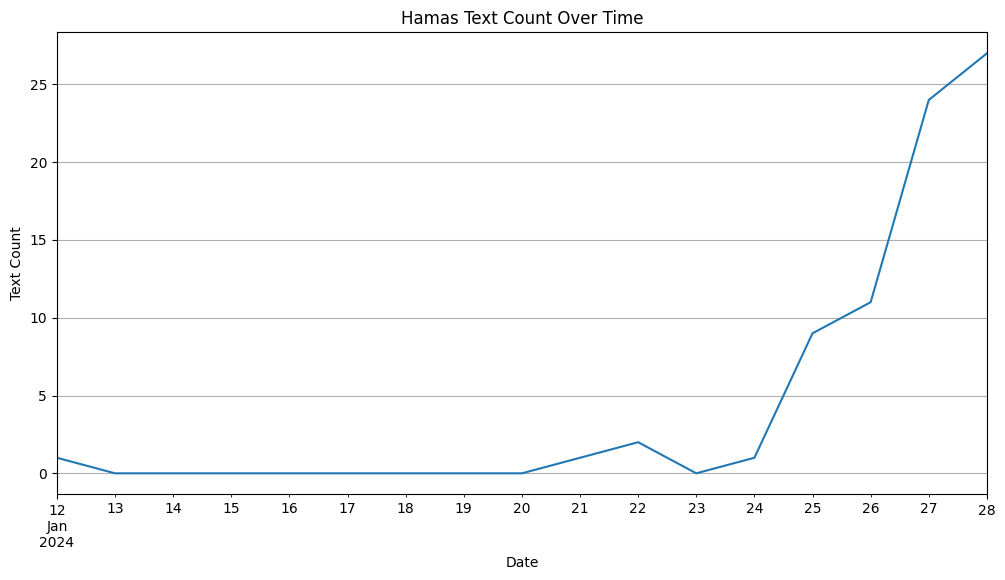

In [106]:
import pandas as pd
import matplotlib.pyplot as plt
# Convert the timestamp column to datetime format
Hamas_data_df['timestamp'] = pd.to_datetime(Hamas_data_df['Time'])
# Set the datetime column as index
Hamas_data_df.set_index('timestamp', inplace=True)
# Group the data by timestamp and calculate the number of texts in each time period
text_count = Hamas_data_df.resample('D').size()

plt.figure(figsize=(12, 6))
text_count.plot()
plt.title('Hamas Text Count Over Time')
plt.xlabel('Date')
plt.ylabel('Text Count')
plt.grid(True)
plt.show()

# 3 Israel Text Analysis

#3.1 Sentiment Analysis

In [156]:
#Delete lines formatted as float
rows_with_floats = Israel_data_df[Israel_data_df.applymap(lambda x: isinstance(x, float)).any(axis=1)]
Israel_data_df = Israel_data_df.drop(rows_with_floats.index)
Israel_df=Israel_data_df['Description']
Israel_df.head()

timestamp
2024-01-27 22:07:30+00:00    Australia, Germany, UK, US and others halt sup...
2024-01-28 11:13:45+00:00    blinking-dot Live updates Live updates,Israel’...
2024-01-26 16:56:49+00:00    Jan 26, 2024, 10:26PM ISTSource: TOI.inThe Int...
2024-01-26 19:12:50+00:00    ICJ Judge Sebutinde voted against emergency me...
2024-01-26 19:09:00+00:00    It was clear, soon after the court's American ...
Name: Description, dtype: object

In [87]:
# Run the polarity score on the entire dataset
Israel_res = {}
for i, row in tqdm(Israel_data_df.iterrows(), total=len(Israel_data_df)):
    text = row['Description']
    myid = row['ID']
    Israel_res[myid] = sia.polarity_scores(text)


  0%|          | 0/90 [00:00<?, ?it/s]

In [88]:
Sentiment_Israel_df = pd.DataFrame(Israel_res).T
Sentiment_Israel_df = Sentiment_Israel_df.reset_index().rename(columns={'index': 'ID'})
Sentiment_Israel_df = Sentiment_Israel_df.merge(Israel_data_df, how='left')

In [110]:
Sentiment_Israel_df.head()

,ID,neg,neu,pos,compound,Title,Time,Description,Source
0,1,0.110,0.830,0.061,-0.7650,Palestinians condemn suspension of UNRWA fundi...,"Sat, 27 Jan 2024 22:07:30 GMT","Australia, Germany, UK, US and others halt sup...",https://news.google.com/rss/articles/CBMibmh0d...
1,2,0.155,0.777,0.068,-0.5574,Israel’s war on Gaza live: Meeting in Paris as...,"Sun, 28 Jan 2024 11:13:45 GMT","blinking-dot Live updates Live updates,Israel’...",https://news.google.com/rss/articles/CBMic2h0d...
2,3,0.017,0.882,0.101,0.8807,Breaking! Hamas'shocking announcement on ICJ r...,"Fri, 26 Jan 2024 16:56:49 GMT","Jan 26, 2024, 10:26PM ISTSource: TOI.inThe Int...",https://news.google.com/rss/articles/CBMiswFod...
3,4,0.138,0.801,0.061,-0.7845,Who is Julia Sebutinde? The judge against all ...,"Fri, 26 Jan 2024 19:12:50 GMT",ICJ Judge Sebutinde voted against emergency me...,https://news.google.com/rss/articles/CBMicWh0d...
4,5,0.053,0.888,0.059,0.0690,Israel reined in by ICJ rulings on Gaza - but ...,"Fri, 26 Jan 2024 19:09:00 GMT","It was clear, soon after the court's American ...",https://news.google.com/rss/articles/CBMiM2h0d...


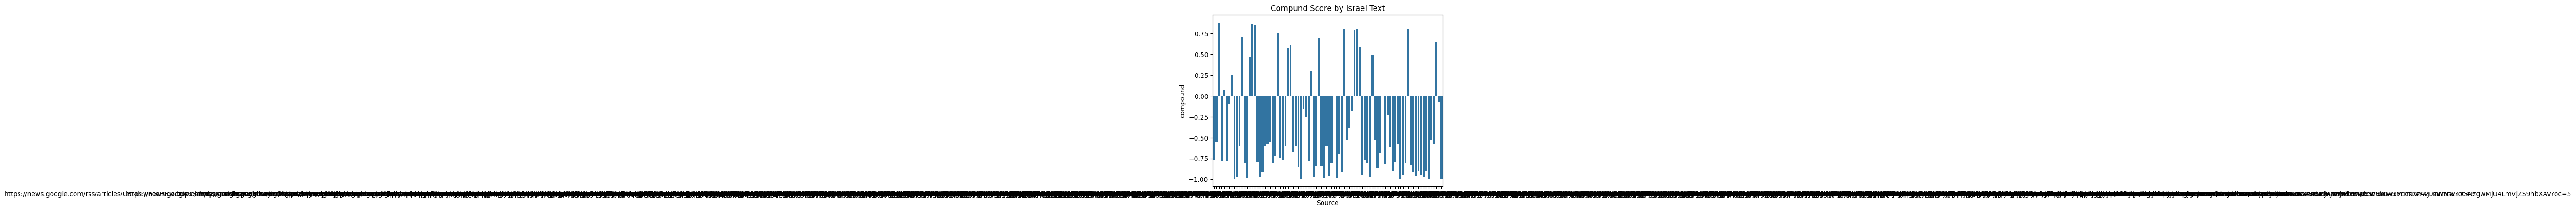

In [90]:
ax = sns.barplot(data=Sentiment_Israel_df, x='Source', y='compound')
ax.set_title('Compund Score by Israel Text')
plt.show()

In [119]:
import plotly.express as px

fig = px.scatter(Sentiment_Israel_df, x='Time', y='compound', title='Israel Scatter Plot',
                 labels={'x': 'X-axis', 'y': 'Y-axis'},
                 hover_name=None)

fig.update_layout(
    xaxis=dict(showgrid=True, title_font=dict(size=14)),
    yaxis=dict(showgrid=True, title_font=dict(size=14)),
    title=dict(x=0.5, xanchor='center', y=0.95, yanchor='top', font=dict(size=16))
)

fig.show()

## 3.2 Wordcloud

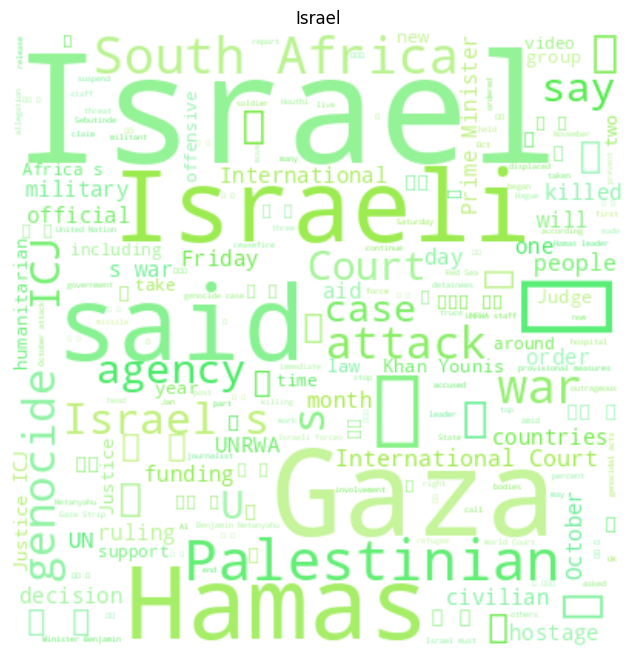

In [91]:

pos_text_cln = " ".join(Israel_df)

def green_color(word, font_size, position, orientation, random_state=None, **kwargs):
    return 'hsl({:d}, 80%, {:d}%)'.format(random.randint(85, 140), random.randint(60, 80))

fig, ax1 = plt.subplots(1, 1, figsize=[15, 8])
wordcloud1 = WordCloud(background_color='white', height=400).generate(pos_text_cln)

ax1.imshow(wordcloud1.recolor(color_func=green_color, random_state=3), interpolation="bilinear")
ax1.axis('off')
ax1.set_title('Israel')

plt.show()


## 3.3 Topic Modelling

In [92]:
#preprocess the text
#step1:find the nouns in the text
def filter_nouns(tokens):
    #Use nltk to tag each token with its part-of-speech tag.
    tagged_tokens = nltk.pos_tag(tokens)
    # Filter the tagged tokens to include only the nouns.
    return [token for token, tag in tagged_tokens if tag.startswith('N')]
#step2:tokenize the text and make the letters lower
def tokenize(text):
    return word_tokenize(text.lower())
#step3:remove the english stopwords
def clean_tokenized_text(tokens):
    cleaned_tokens = [re.sub(r'[^a-zA-Z]', '', token) for token in tokens]
    cleaned_tokens = [token for token in cleaned_tokens if token]
    return cleaned_tokens
def remove_stopwords(tokens):
    # Get the stop words for the English language.
    stop_words = set(stopwords.words('english'))
    return [token for token in tokens if not token in stop_words]
#step4:lemmatize the text words
def lemmatize(tokens):
    # Create a WordNetLemmatizer object.
    lemmatizer = WordNetLemmatizer()
     # Lemmatize the token in the list.
    return [lemmatizer.lemmatize(token) for token in tokens]

In [93]:
Israel_preprocessed_corpus = []

for document in Israel_df:
    tokens = tokenize(document)
    tokens = remove_stopwords(tokens)
    tokens = lemmatize(tokens)
    tokens = filter_nouns(tokens)
    tokens = clean_tokenized_text(tokens)
    Israel_preprocessed_corpus.append(tokens)

print(Israel_preprocessed_corpus)

[['australia', 'germany', 'others', 'support', 'israel', 'staff', 'involvement', 'hamas', 'attack', 'country', 'funding', 'agency', 'head', 'unrwa', 'support', 'unrwa', 'agency', 'work', 'help', 'need', 'assistance', 'gaza', 'authority', 'information', 'employee', 'attack', 'israel', 'october', 'lazzarini', 'canada', 'development', 'minister', 'hussen', 'funding', 'conduct', 'investigation'], ['update', 'update', 'war', 'gaza', 'meeting', 'progress', 'reportedcia', 'head', 'burn', 'talk', 'israel', 'qatar', 'pause', 'fighting'], ['jan', 'istsource', 'court', 'justice', 'icj', 'ruling', 'south', 'africa', 'emergency', 'measure', 'genocide', 'case', 'israel', 'landmark', 'decision', 'court', 'step', 'prevent', 'act', 'strip', 'development', 'anticipation', 'hamas', 'icj', 'deliberation', 'israel', 'genocidefollowing', 'icj', 'ruling', 'leader', 'osama', 'press', 'conference', 'organization', 'stance', 'ceasefire', 'icj', 'condition', 'israel', 'reciprocates', 'move', 'hamas', 'release', 

In [94]:
#create a mapping between each word in the positive_preprocessed_corpus and a ID
id2word = corpora.Dictionary(Israel_preprocessed_corpus)
texts = Israel_preprocessed_corpus
#Creates a bag-of-words representation corpus for each document in the text with dictionary id2word.
corpus = [id2word.doc2bow(text) for text in texts]

In [95]:
#creat the Gensim LDA model and train it with corpus and id2word
lda_model = gensim.models.ldamodel.LdaModel(
    #num_topics sets the number of topics
    #random_state sets the random seed for topic modeling to keep a consistent results.
   corpus=corpus, id2word=id2word, num_topics=3, random_state=6,
    #update_every sets the frequency at which the model parameters are updated
    #chunksize sets the number of documents to be used in each training chunk
    #passes sets the number of times the model should pass over the corpus during training.
   update_every=3, chunksize=100, passes=200, alpha='auto', per_word_topics=True
)


In [96]:
#prints the topics learned by the trained LDA model
pprint(lda_model.print_topics())

[(0,
  '0.034*"israel" + 0.027*"gaza" + 0.021*"hamas" + 0.020*"agency" + '
  '0.018*"attack" + 0.013*"war" + 0.011*"people" + 0.010*"unrwa" + '
  '0.009*"staff" + 0.009*"funding"'),
 (1,
  '0.016*"gaza" + 0.015*"attack" + 0.013*"israel" + 0.012*"sea" + '
  '0.010*"judge" + 0.009*"missile" + 0.008*"system" + 0.006*"conflict" + '
  '0.006*"time" + 0.006*"force"'),
 (2,
  '0.048*"israel" + 0.036*"court" + 0.036*"gaza" + 0.025*"icj" + 0.023*"war" + '
  '0.022*"case" + 0.017*"justice" + 0.017*"genocide" + 0.013*"south" + '
  '0.012*"measure"')]


The first  topic appears to focus on the conflict between Israel and Hamas in Gaza, involving terms related to agencies, attacks, funding, and people affected by the war.

The second one discuss military aspects of the conflict, including attacks, missiles, and the naval aspect with terms like sea and missile system.

The third one revolves around legal matters related to the conflict, with mentions of courts, the International Court of Justice (ICJ), cases, justice, and genocide allegations.

#3.4 Time Series Analysis

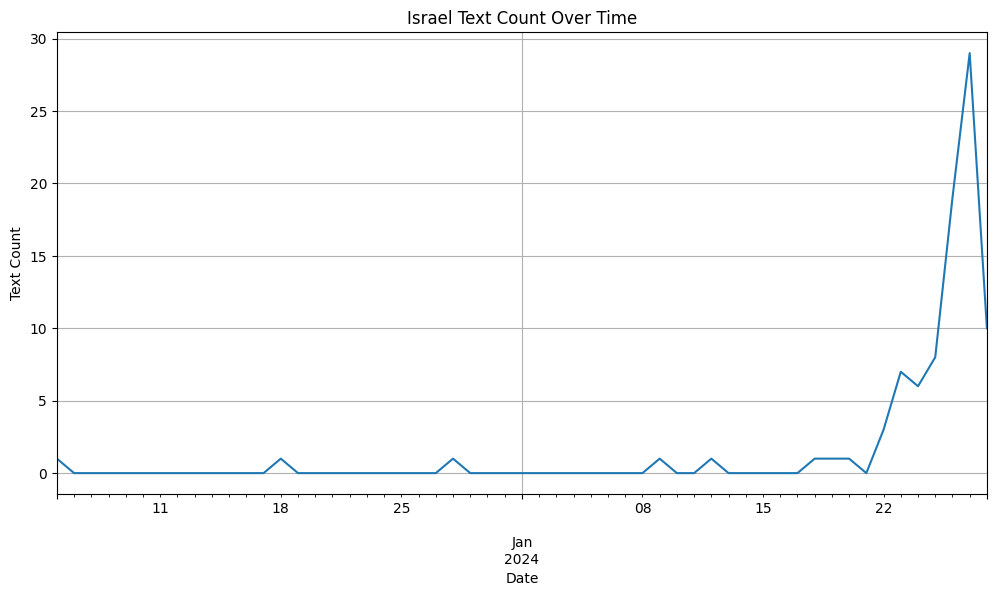

In [116]:
# Convert the timestamp column to datetime format
Israel_data_df['timestamp'] = pd.to_datetime(Israel_data_df['Time'])
# Set the datetime column as index
Israel_data_df.set_index('timestamp', inplace=True)
# Group the data by timestamp and calculate the number of texts in each time period
text_count = Israel_data_df.resample('D').size()

plt.figure(figsize=(12, 6))
text_count.plot()
plt.title('Israel Text Count Over Time')
plt.xlabel('Date')
plt.ylabel('Text Count')
plt.grid(True)
plt.show()

## 3.4 Network Analysis

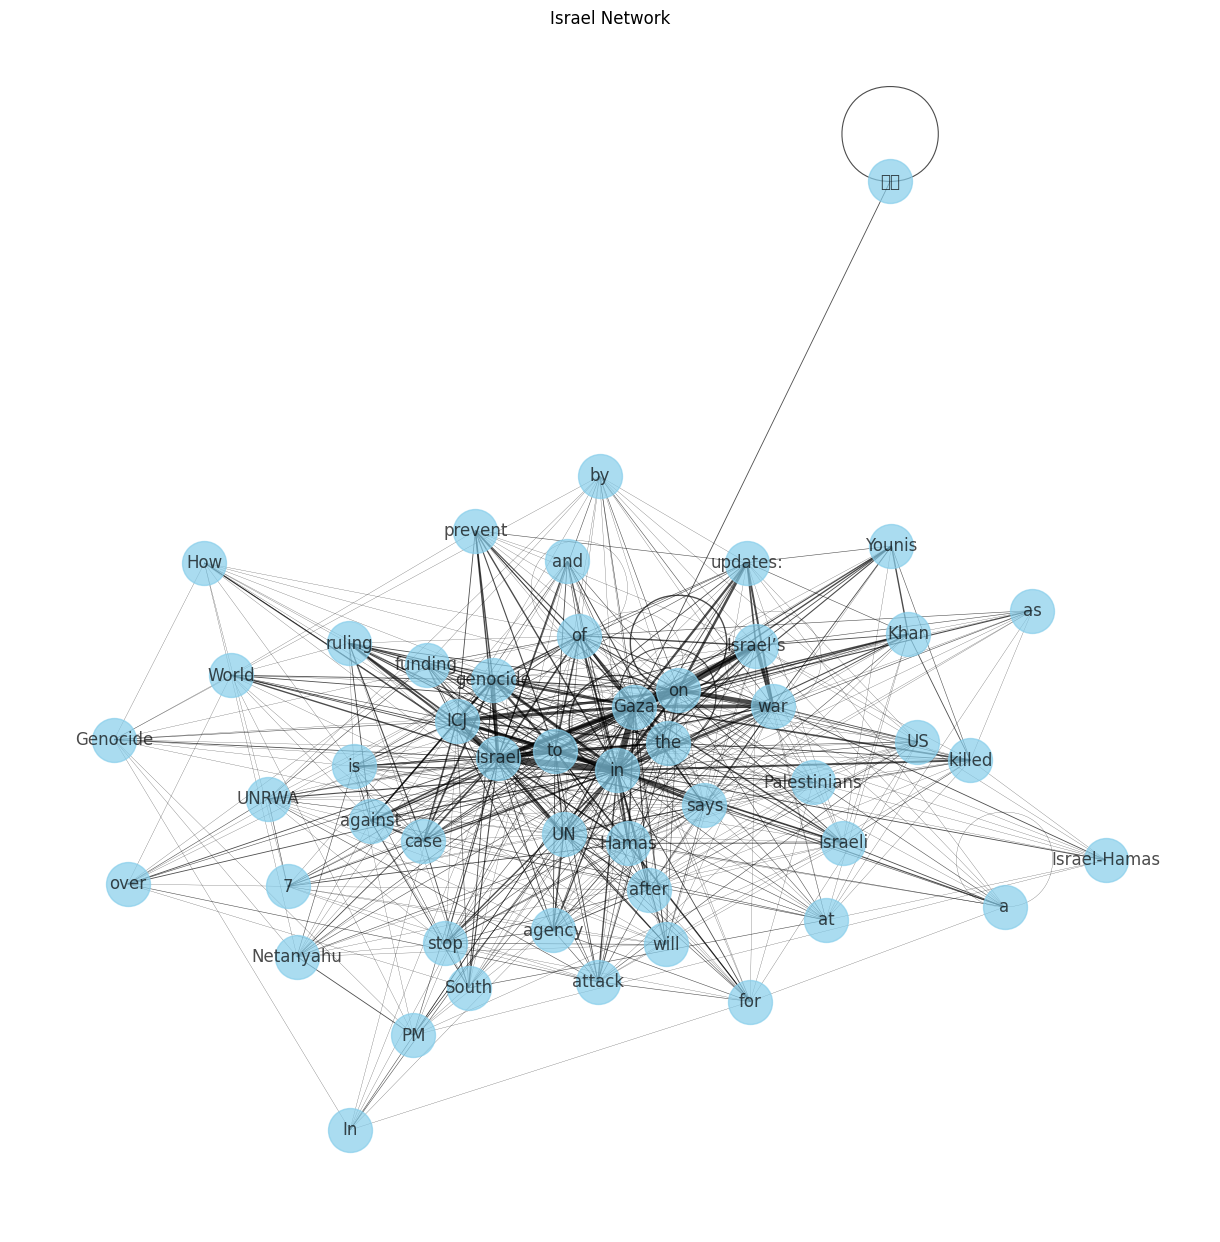

In [158]:

all_keywords = [extract_keywords(text) for text in Israel_data_df['Title']]
word_counts = Counter([word for keywords in all_keywords for word in keywords])
top_words = [word for word, count in word_counts.most_common(50)]

G = nx.Graph()

for keywords in all_keywords:
    for word1, word2 in combinations(keywords, 2):
        if word1 in top_words and word2 in top_words:
            if G.has_edge(word1, word2):
                G[word1][word2]['weight'] += 1
            else:
                G.add_edge(word1, word2, weight=1)


plt.figure(figsize=(12, 12))
pos = nx.spring_layout(G, k=0.5)
nx.draw(G, pos, node_size=1000, node_color='skyblue', with_labels=True, font_size=12,
        width=[d['weight']*0.2 for (u, v, d) in G.edges(data=True)], alpha=0.7)
plt.title('Israel Network')
plt.show()